# Data Analytics Project - Backtesting Model Predictions

# ASHOKLEY STOCK MODELS EVALUATION

---

# 1. Importing Required Modules

In [1]:
import pandas as pd

# 2. Get required datasets

## 2.1. Get the orders dataset of ASHOKLEY

In [2]:
orders_df = pd.read_csv('../Preprocess/Pair4/Pair4_orders.csv')
orders_df.head()

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996,LONG
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445,LONG
2,2019-05-21,88.250000,83.150002,5.099998,-0.329109,FLAT
3,2019-05-22,87.849998,85.400002,2.449997,-1.330453,FLAT
4,2019-05-23,88.849998,84.849998,4.000000,-0.744760,FLAT


In [3]:
orders_df.tail()

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
57,2019-08-07,61.150002,55.650002,5.500000,-0.177963,FLAT
58,2019-08-08,63.549999,58.750000,4.799999,-0.442469,FLAT
59,2019-08-09,64.300003,58.200001,6.100002,0.048757,FLAT
60,2019-08-13,61.549999,57.700001,3.849998,-0.801441,FLAT
61,2019-08-14,62.549999,57.349998,5.200001,-0.291322,FLAT


## 2.2. Visualize the orders

Text(0, 0.5, 'zscore')

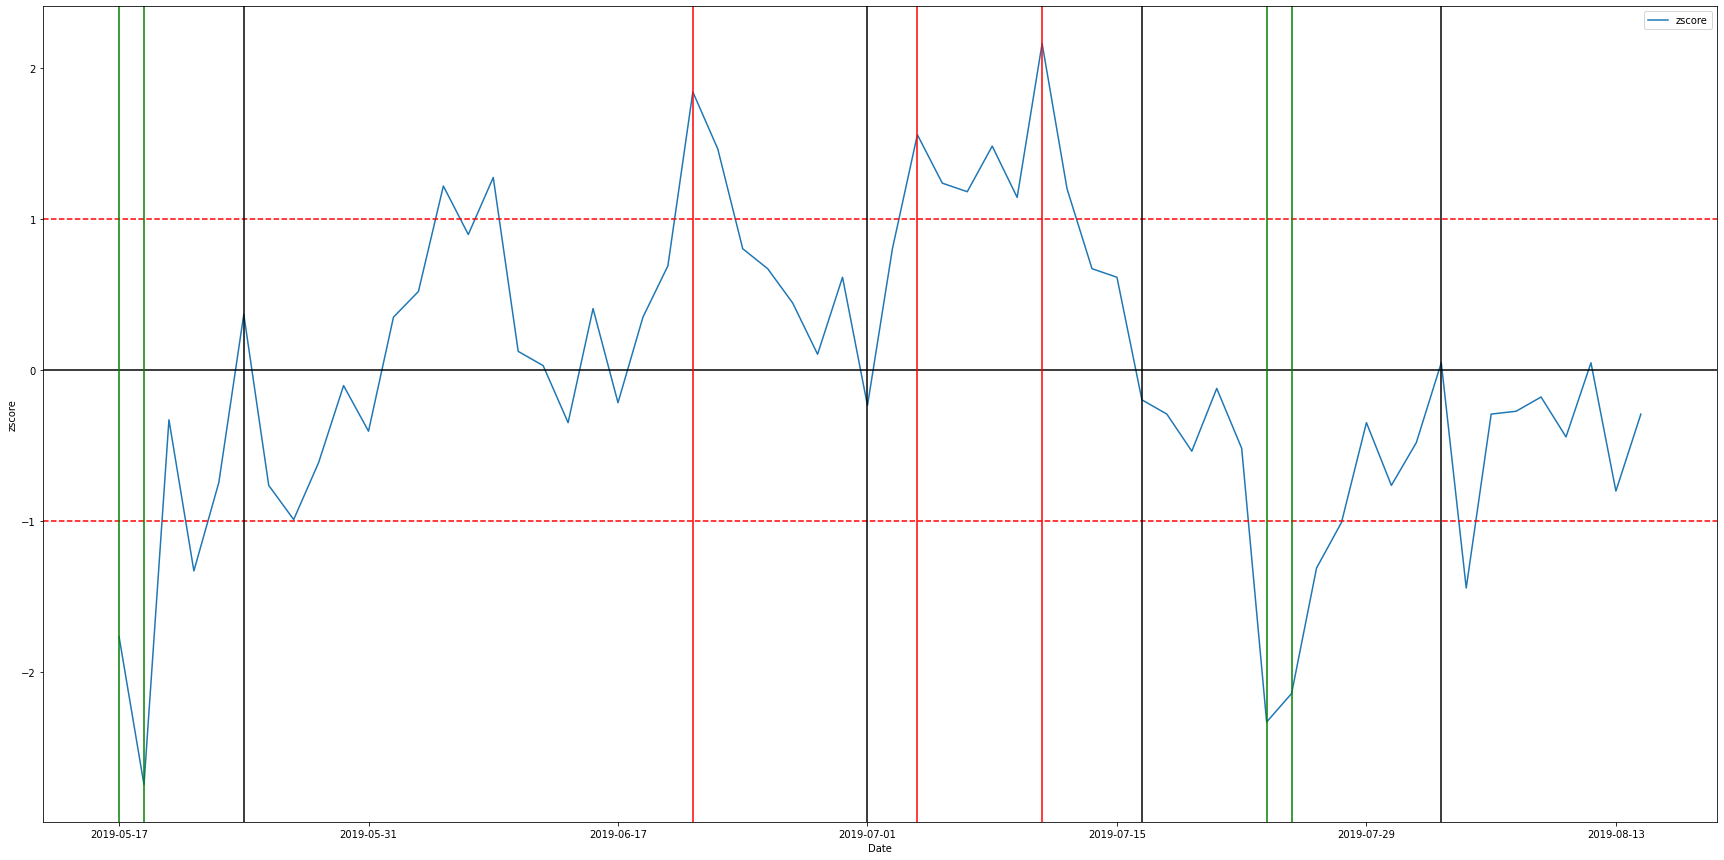

In [4]:
# Plotting the zscore of the Spread
orders_plt = orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")

orders_plt.set_ylabel("zscore")

__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 2.3. Get the predicitions dataset of ASHOKLEY

In [5]:
predictions = pd.read_csv("../Models/Pair4/Ashokley_predicitions.csv")
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
0,2019-05-17,84.500000,120.973240,128.025796,NaN
1,2019-05-20,87.550003,120.949883,127.611621,NaN
2,2019-05-21,88.250000,120.926525,129.149894,NaN
3,2019-05-22,87.849998,120.903168,123.576205,NaN
4,2019-05-23,88.849998,120.150063,120.873591,NaN


In [6]:
predictions = predictions.dropna()
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
10,2019-05-31,88.849998,119.256814,127.221978,130.58664
11,2019-06-03,91.849998,119.210099,125.422256,130.34573
12,2019-06-04,93.050003,118.456994,126.093696,129.85146
13,2019-06-06,91.300003,118.433637,128.022561,128.99065
14,2019-06-07,90.000000,118.410279,129.136564,128.00269


## 2.4 Visualize the predictions by different models

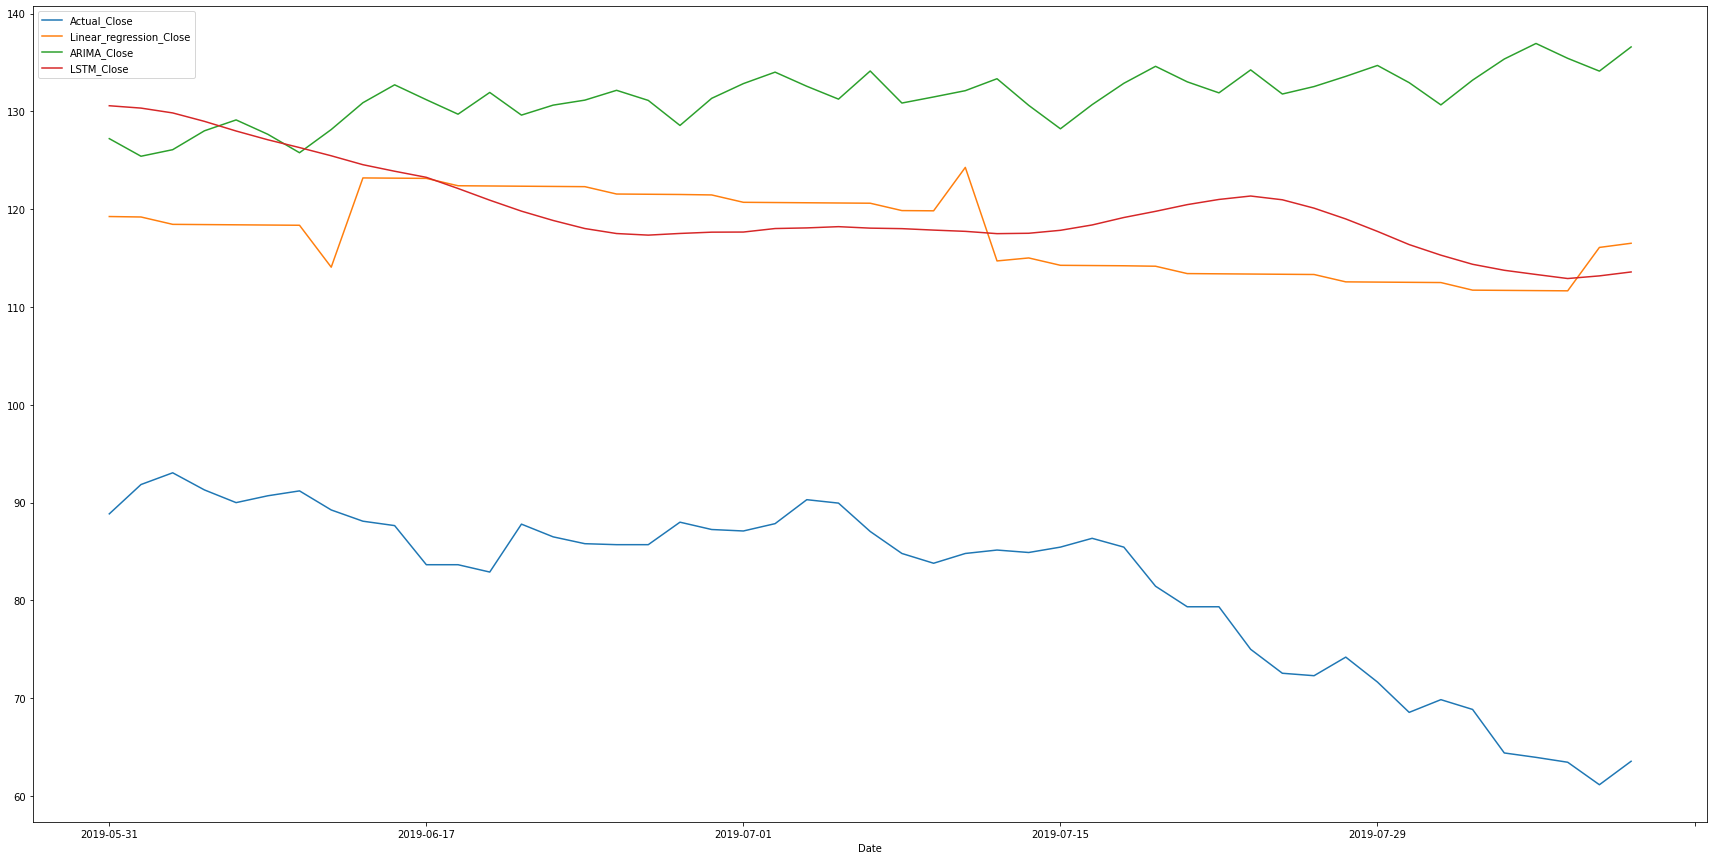

In [7]:
predictions.plot(x='Date', y=['Actual_Close', 'Linear_regression_Close', 'ARIMA_Close', 'LSTM_Close'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Price in rupees
- __Blue line__ - Actual data in the time period of correlation
- __Orange line__ - Linear Regression predictions for the time period
- __Red line__ - LSTM predictions for the time period
- __Green line__ - ARIMA predictions for the time period


---

# 3. Set parameters of trading

In [8]:
CAPITAL = 1000000
RISK = 20000 # Max risk allowed per trade (2% of capital)

- CAPITAL - Total amout of money willing to be spent.
- RISK - Amount to spend per trade (maximum).
- OPEN POSITION - Buy/Short shares of stock worth 20000.
- CLOSE POSITION - Buy/Sell shares to consolidate open positions and take profit/loss.
- TRADE_BOOK - Keeps track of all open positions.
- For the purpose of this experiment, we assume no brokerage costs, which is a fair assumption as many brokers (such as zerodha, robinhood, sharekhan, etc.) offer equity delivery at no cost.

---

# 4. Evaluate all individual orders

## 4.1. Display all orders which are not *FLAT*

In [9]:
not_flat_orders = orders_df[orders_df['Orders'] != 'FLAT']
not_flat_orders

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996,LONG
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445,LONG
5,2019-05-24,93.800003,86.849998,6.950005,0.369944,GET_OUT_OF_POSITION
23,2019-06-20,87.800003,76.949997,10.850006,1.843619,SHORT
30,2019-07-01,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
32,2019-07-03,90.300003,80.199997,10.100006,1.560220,SHORT
37,2019-07-10,84.800003,73.099998,11.700005,2.164804,SHORT
41,2019-07-16,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
46,2019-07-23,75.000000,75.199997,-0.199997,-2.331794,LONG
47,2019-07-24,72.550003,72.250000,0.300003,-2.142861,LONG


In [10]:
not_flat_orders = not_flat_orders.set_index('Date').reset_index()
not_flat_orders

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996,LONG
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445,LONG
2,2019-05-24,93.800003,86.849998,6.950005,0.369944,GET_OUT_OF_POSITION
3,2019-06-20,87.800003,76.949997,10.850006,1.843619,SHORT
4,2019-07-01,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
5,2019-07-03,90.300003,80.199997,10.100006,1.560220,SHORT
6,2019-07-10,84.800003,73.099998,11.700005,2.164804,SHORT
7,2019-07-16,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
8,2019-07-23,75.000000,75.199997,-0.199997,-2.331794,LONG
9,2019-07-24,72.550003,72.250000,0.300003,-2.142861,LONG


## 4.2 Flip all orders

In [11]:
def flip_orders(orders):
    
    flipped_orders = []
    
    for order in orders:
        if order == 'SHORT':
            flipped_orders.append('LONG')
        elif order == 'LONG':
            flipped_orders.append('SHORT')
        else:
            flipped_orders.append(order)
    
    return flipped_orders


In [12]:
# not_flat_orders['Orders'] = flip_orders(not_flat_orders['Orders'])
not_flat_orders

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996,LONG
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445,LONG
2,2019-05-24,93.800003,86.849998,6.950005,0.369944,GET_OUT_OF_POSITION
3,2019-06-20,87.800003,76.949997,10.850006,1.843619,SHORT
4,2019-07-01,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
5,2019-07-03,90.300003,80.199997,10.100006,1.560220,SHORT
6,2019-07-10,84.800003,73.099998,11.700005,2.164804,SHORT
7,2019-07-16,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
8,2019-07-23,75.000000,75.199997,-0.199997,-2.331794,LONG
9,2019-07-24,72.550003,72.250000,0.300003,-2.142861,LONG


- As ASHOKLEY is the stock with the higher price value, in pair trading we need to take the position opposite to the one we take on the larger stock. Hence the positions to take are __NOT__ flipped.

## 4.3. Get predictions of dates where orders are placed

### 4.3.1. Filter rows in predictions to only include dates where orders are placed

In [13]:
not_flat_orders = not_flat_orders.set_index('Date')
not_flat_orders

,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
Date,,,,,
2019-05-17,84.500000,83.199997,1.300003,-1.764996,LONG
2019-05-20,87.550003,88.849998,-1.299995,-2.747445,LONG
2019-05-24,93.800003,86.849998,6.950005,0.369944,GET_OUT_OF_POSITION
2019-06-20,87.800003,76.949997,10.850006,1.843619,SHORT
2019-07-01,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
2019-07-03,90.300003,80.199997,10.100006,1.560220,SHORT
2019-07-10,84.800003,73.099998,11.700005,2.164804,SHORT
2019-07-16,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
2019-07-23,75.000000,75.199997,-0.199997,-2.331794,LONG


In [14]:
predicitions = predictions.set_index('Date')
predicitions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
Date,,,,
2019-05-31,88.849998,119.256814,127.221978,130.586640
2019-06-03,91.849998,119.210099,125.422256,130.345730
2019-06-04,93.050003,118.456994,126.093696,129.851460
2019-06-06,91.300003,118.433637,128.022561,128.990650
2019-06-07,90.000000,118.410279,129.136564,128.002690
2019-06-10,90.699997,118.386922,127.668363,127.106865
2019-06-11,91.199997,118.363564,125.781528,126.308580
2019-06-12,89.250000,114.075752,128.151713,125.469696
2019-06-13,88.099998,123.204455,130.896111,124.557014


In [15]:
orders_predictions = predicitions.join(not_flat_orders)
orders_predictions = orders_predictions.dropna()
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
Date,,,,,,,,,
2019-06-20,87.800003,122.357920,129.628555,119.807470,87.800003,76.949997,10.850006,1.843619,SHORT
2019-07-01,87.099998,120.711566,132.850137,117.669820,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
2019-07-03,90.300003,120.664851,132.578037,118.093370,90.300003,80.199997,10.100006,1.560220,SHORT
2019-07-10,84.800003,124.280191,132.127334,117.740930,84.800003,73.099998,11.700005,2.164804,SHORT
2019-07-16,86.349998,114.245199,130.698459,118.394150,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
2019-07-23,75.000000,113.375307,134.252863,121.354256,75.000000,75.199997,-0.199997,-2.331794,LONG
2019-07-24,72.550003,113.351949,131.784740,120.969760,72.550003,72.250000,0.300003,-2.142861,LONG
2019-08-01,68.849998,111.728953,133.204264,114.372765,68.849998,62.750000,6.099998,0.048756,GET_OUT_OF_POSITION


### 4.3.2 Remove columns in orders and predictions dataframe

In [16]:
orders_predictions = orders_predictions.drop(columns=['ASHOKLEY_Close', 'TATAMTRDVR_Close', 'Spread', 'zscore'])
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2019-06-20,87.800003,122.357920,129.628555,119.807470,SHORT
2019-07-01,87.099998,120.711566,132.850137,117.669820,GET_OUT_OF_POSITION
2019-07-03,90.300003,120.664851,132.578037,118.093370,SHORT
2019-07-10,84.800003,124.280191,132.127334,117.740930,SHORT
2019-07-16,86.349998,114.245199,130.698459,118.394150,GET_OUT_OF_POSITION
2019-07-23,75.000000,113.375307,134.252863,121.354256,LONG
2019-07-24,72.550003,113.351949,131.784740,120.969760,LONG
2019-08-01,68.849998,111.728953,133.204264,114.372765,GET_OUT_OF_POSITION


### 4.3.3 Create function to evaluate orders

In [17]:
def evaluate_orders(orders_df):
    
    actual_profits = []
    LR_profits = []
    ARIMA_profits = []
    LSTM_profits = []
    shares = []
    
    num_orders = len(orders_df["Orders"])
    
    for i in range(num_orders):
        
        if i == num_orders - 1:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
            break
        
        position = orders_df['Orders'][i]
        close = orders_df['Actual_Close'][i]
        LR_close = orders_df['Linear_regression_Close'][i]
        ARIMA_close = orders_df['ARIMA_Close'][i]
        LSTM_close = orders_df['LSTM_Close'][i]
        
        print()
        
        print("ORDER: ", i, close, LR_close, ARIMA_close, LSTM_close, position)
        
        if position == 'LONG' or position == 'SHORT':
            
            no_of_shares = 20000//close
            
            for j in range(i+1, num_orders):
                
                if (j == num_orders - 1) or orders_df['Orders'][j] == 'GET_OUT_OF_POSITION':
                    
                    actual_profit = orders_df['Actual_Close'][j] - orders_df['Actual_Close'][i]
                    LR_profit = orders_df['Linear_regression_Close'][j] - orders_df['Linear_regression_Close'][i]
                    ARIMA_profit = orders_df['ARIMA_Close'][j] - orders_df['ARIMA_Close'][i]
                    LSTM_profit = orders_df['LSTM_Close'][j] - orders_df['LSTM_Close'][i]
                    
                    actual_profit *= no_of_shares
                    LR_profit *= no_of_shares
                    ARIMA_profit *= no_of_shares
                    LSTM_profit  *= no_of_shares
                    
                    if position == 'SHORT':
                        actual_profit *= -1
                        LR_profit *= -1
                        ARIMA_profit *= -1
                        LSTM_profit *= -1
                    
                    print('number of shares: ', no_of_shares)
                    print('actual profit: ', actual_profit)
                    print('LR profit: ', LR_profit)
                    print('ARIMA profit: ', ARIMA_profit)
                    print('LSTM profit: ', LSTM_profit)
                    
                    shares.append(no_of_shares)
                    actual_profits.append(actual_profit)
                    LR_profits.append(LR_profit)
                    ARIMA_profits.append(ARIMA_profit)
                    LSTM_profits.append(LSTM_profit)
                    
                    break
        else:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
        
        print()
    
    return actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares
                    

In [18]:
actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares = evaluate_orders(orders_predictions)


ORDER:  0 87.80000305175781 122.35792012074444 129.62855484153818 119.80747 SHORT
number of shares:  227.0
actual profit:  158.90103912353516
LR profit:  373.72236565793395
ARIMA profit:  -731.2991118423578
LSTM profit:  485.24654999999854


ORDER:  1 87.0999984741211 120.71156608700905 132.85013683203314 117.66982 GET_OUT_OF_POSITION


ORDER:  2 90.3000030517578 120.66485098114937 132.57803662510236 118.09337 SHORT
number of shares:  221.0
actual profit:  872.9510116577117
LR profit:  1418.7430685324557
ARIMA profit:  415.3865919125761
LSTM profit:  -66.4723800000007


ORDER:  3 84.80000305175781 124.28019067824287 132.12733369033904 117.74093 SHORT
number of shares:  235.0
actual profit:  -364.2489242553711
LR profit:  2358.223023862797
ARIMA profit:  335.7854849887905
LSTM profit:  -153.50669999999775


ORDER:  4 86.3499984741211 114.24519908733735 130.69845928613142 118.39415 GET_OUT_OF_POSITION


ORDER:  5 75.0 113.37530696461 134.2528633145258 121.354256 LONG
number of shares:  

In [19]:
actual_profits

[158.90103912353516,
 0,
 872.9510116577117,
 -364.2489242553711,
 0,
 -1635.9004058837852,
 -1017.5012588500938,
 0]

In [20]:
LR_profits

[373.72236565793395,
 0,
 1418.7430685324557,
 2358.223023862797,
 0,
 -437.9301729736294,
 -446.3240322213554,
 0]

In [21]:
LSTM_profits

[485.24654999999854,
 0,
 -66.4723800000007,
 -153.50669999999775,
 0,
 -1857.0766060000053,
 -1814.1736250000058,
 0]

In [22]:
shares

[227.0, 0, 221.0, 235.0, 0, 266.0, 275.0, 0]

In [23]:
ARIMA_profits

[-731.2991118423578,
 0,
 415.3865919125761,
 335.7854849887905,
 0,
 -278.9273631002378,
 390.3692271649646,
 0]

### 4.3.4 Adding evaluated orders to dataframe

In [24]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2019-06-20,87.800003,122.357920,129.628555,119.807470,SHORT
2019-07-01,87.099998,120.711566,132.850137,117.669820,GET_OUT_OF_POSITION
2019-07-03,90.300003,120.664851,132.578037,118.093370,SHORT
2019-07-10,84.800003,124.280191,132.127334,117.740930,SHORT
2019-07-16,86.349998,114.245199,130.698459,118.394150,GET_OUT_OF_POSITION
2019-07-23,75.000000,113.375307,134.252863,121.354256,LONG
2019-07-24,72.550003,113.351949,131.784740,120.969760,LONG
2019-08-01,68.849998,111.728953,133.204264,114.372765,GET_OUT_OF_POSITION


In [25]:
orders_predictions['Shares'] = shares
orders_predictions['Actual_profit'] = actual_profits
orders_predictions['Linear_regression_profit'] = LR_profits
orders_predictions['ARIMA_profit'] = ARIMA_profits
orders_predictions['LSTM_profit'] = LSTM_profits

In [26]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
Date,,,,,,,,,,
2019-06-20,87.800003,122.357920,129.628555,119.807470,SHORT,227.0,158.901039,373.722366,-731.299112,485.246550
2019-07-01,87.099998,120.711566,132.850137,117.669820,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000
2019-07-03,90.300003,120.664851,132.578037,118.093370,SHORT,221.0,872.951012,1418.743069,415.386592,-66.472380
2019-07-10,84.800003,124.280191,132.127334,117.740930,SHORT,235.0,-364.248924,2358.223024,335.785485,-153.506700
2019-07-16,86.349998,114.245199,130.698459,118.394150,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000
2019-07-23,75.000000,113.375307,134.252863,121.354256,LONG,266.0,-1635.900406,-437.930173,-278.927363,-1857.076606
2019-07-24,72.550003,113.351949,131.784740,120.969760,LONG,275.0,-1017.501259,-446.324032,390.369227,-1814.173625
2019-08-01,68.849998,111.728953,133.204264,114.372765,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000


### 4.3.5 Visualizing the profits

In [27]:
orders_predictions = orders_predictions.reset_index()

In [28]:
orders_predictions

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
0,2019-06-20,87.800003,122.357920,129.628555,119.807470,SHORT,227.0,158.901039,373.722366,-731.299112,485.246550
1,2019-07-01,87.099998,120.711566,132.850137,117.669820,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000
2,2019-07-03,90.300003,120.664851,132.578037,118.093370,SHORT,221.0,872.951012,1418.743069,415.386592,-66.472380
3,2019-07-10,84.800003,124.280191,132.127334,117.740930,SHORT,235.0,-364.248924,2358.223024,335.785485,-153.506700
4,2019-07-16,86.349998,114.245199,130.698459,118.394150,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000
5,2019-07-23,75.000000,113.375307,134.252863,121.354256,LONG,266.0,-1635.900406,-437.930173,-278.927363,-1857.076606
6,2019-07-24,72.550003,113.351949,131.784740,120.969760,LONG,275.0,-1017.501259,-446.324032,390.369227,-1814.173625
7,2019-08-01,68.849998,111.728953,133.204264,114.372765,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000


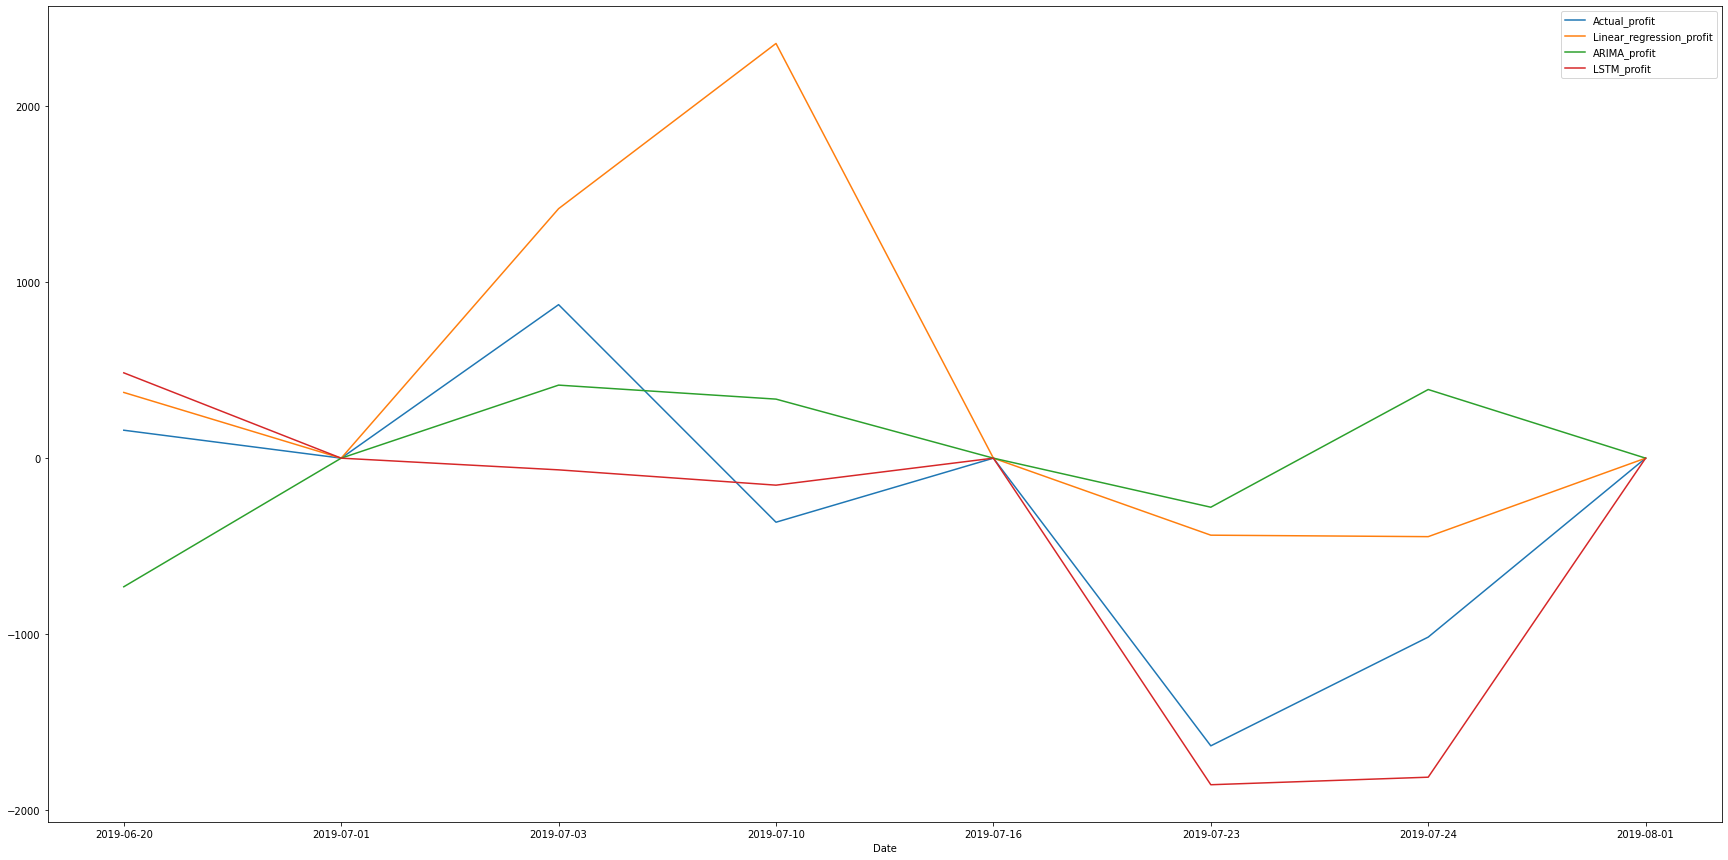

In [29]:
orders_predictions.plot(x='Date', y=['Actual_profit', 'Linear_regression_profit', 'ARIMA_profit', 'LSTM_profit'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Profit
- __Blue line__ - Actual profit
- __Orange line__ - Linear Regression predicted profit
- __Green line__ - ARIMA predicted profit
- __Red line__ - LSTM predicted profit

---